<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/Hierarchical_Agglomerative_Clustering_15MI33017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Agglomerative Clustering

In [0]:
# importing Libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering as clustering #for testing the result

In [0]:
# Dataset loading
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/15MI33017/AAA.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exploratory Data Analysis

In [0]:
print(data.shape)
print(data.describe())
print(data.info())
print(data.columns)

(150, 5)
                                                    Title  ...                                           Abstract
count                                                 150  ...                                                150
unique                                                150  ...                                                150
top     Multi-agent Knowledge and Belief Change in the...  ...  We introduce m-transportability, a generalizat...
freq                                                    1  ...                                                  1

[4 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Title                    150 non-null object
Keywords                 150 non-null object
Topics                   150 non-null object
High-Level Keyword(s)    150 non-null object
Abstract                 150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB
None
Index(['Title', 'Keywords

In [0]:
data.head(10)

,Title,Keywords,Topics,High-Level Keyword(s),Abstract
0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We propose a new market design for display adv...
5,Gradient Networks for Shape-Based Object Insta...,object detection\ninstance detection\nshape\ng...,"Vision, Object Recognition, and Perception",Robotics,We present a novel framework for shape-based t...
6,Unified Constraint Propagation on Multi-View Data,pairwise constraint propagation\nsemi-supervis...,Relational/Graph-Based Learning\nSemisupervise...,Machine Learning,This paper presents a unified framework for in...
7,Progression of Decomposed Situation Calculus T...,reasoning about actions\ndecomposition of logi...,"Action, Change, and Causality",Knowledge Representation and Reasoning,In many tasks related to reasoning about conse...
8,How to Cut a Cake Before the Party Ends,Cake cutting\nFair division\nComputational soc...,Mechanism Design\nSocial Choice / Voting,Multiagent Systems,For decades researchers have struggled with th...
9,Reciprocal Hash Tables for Nearest Neighbor Se...,locality sensitive hashing\nnearest neighbor s...,Search (General/Other)\nInformation Retrieval\...,Machine Learning,Recent years have witnessed the success of has...


In [0]:
# Unique HL Keywords
data['High-Level Keyword(s)'].unique()

array(['Multiagent Systems', 'Machine Learning',
       'Heuristic Search and Optimization', 'Robotics',
       'Knowledge Representation and Reasoning',
       'Multidisciplinary Topics', 'Constraints and Satisfiability',
       'Natural Language Processing',
       'Reasoning about Plans, Processes, and Actions'], dtype=object)

#Jaccard-distance

In [0]:
# Jaccard-distance = 1-Jaccard-similarity
# Function for returning Jaccarad Distance between two sets
def jaccard_dist(list1, list2): 
    a = set(list1.split()) 
    b = set(list2.split())
    c = a.intersection(b)
    return (1-float(len(c)) / (len(a) + len(b) - len(c)))

# Distance Matrix for each attribute

In [0]:
# Distance Matrix for Title
Title = []
for i in range(data.shape[0]):
  temp = []
  for j in range(data.shape[0]):
    dist = jaccard_dist(data['Title'][i],data['Title'][j])
    temp.append(dist)
  Title.append(temp)

In [0]:
# Distance Matrix for Keywords
keywords = []
for i in range(data.shape[0]):
  temp = []
  for j in range(data.shape[0]):
    dist = jaccard_dist(data['Keywords'][i],data['Keywords'][j])
    temp.append(dist)
  keywords.append(temp)

In [0]:
# Distance Matrix for topics
topics = []
for i in range(data.shape[0]):
  temp = []
  for j in range(data.shape[0]):
    dist = jaccard_dist(data['Topics'][i],data['Topics'][j])
    temp.append(dist)
  topics.append(temp)

In [0]:
# Distance Matrix for abstract
abstract = []
for i in range(data.shape[0]):
  temp = []
  for j in range(data.shape[0]):
    dist = jaccard_dist(data['Abstract'][i],data['Abstract'][j])
    temp.append(dist)
  abstract.append(temp)

# Hierarchical Agglomerative Clustering Implementation (Single,Complete Linkage)

In [0]:
# HAC
def hierarchical_clustering(data,linkage,num_clusters):  
    initial_distances = pairwise_distances(data,metric='precomputed')
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage)
    iteration_number = initial_distances.shape[0] - num_clusters
    clusters_ = clusters[iteration_number]
    return clusters_
    


In [0]:
def find_clusters(inputt,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    for n in range(inputt.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    for k in range(1, inputt.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, inputt.shape[0]):
            for j in range(0, inputt.shape[1]):
                if(inputt[i][j]<=min_val):
                    min_val = inputt[i][j]
                    row_index = i
                    col_index = j
                    
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        #for Single Linkage
        if(linkage == "single" ):
            for i in range(0,inputt.shape[0]):
                if(i != col_index):
                    temp = min(inputt[col_index][i],inputt[row_index][i])
                    inputt[col_index][i] = temp
                    inputt[i][col_index] = temp
        #for Complete Linkage
        elif(linkage == "complete"):
             for i in range(0,inputt.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = max(inputt[col_index][i],inputt[row_index][i])
                    inputt[col_index][i] = temp
                    inputt[i][col_index] = temp      
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,inputt.shape[0]):
            inputt[row_index][i] = sys.maxsize
            inputt[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

# Single Linkage Result

In [0]:
Title_clusters = hierarchical_clustering(Title,'single',9)
keywords_clusters = hierarchical_clustering(keywords,'single',9)
topics_clusters = hierarchical_clustering(topics,'single',9)
abstract_clusters = hierarchical_clustering(abstract,'single',9)
print(Title_clusters)
print(keywords_clusters)
print(topics_clusters)
print(abstract_clusters)
#Each unique no. represents they are forming their own cluster. 
#For example: In title based clusters mostly every title is under 0th title cluster, 
#but 6th, 28th, 38th, 84th, 87th, 111th, 145th, 146th indexed titles are forming separate clusters 
#hence total no. of clusters=9. Same goes for other attribute based clusters as well.

[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 145, 146, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 101, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 14, 148, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 10, 11, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

Each unique no. represents they are forming their own cluster.
For example: In title based clusters mostly every title is under 0th title cluster, but 6th, 28th, 38th, 84th, 87th, 111th, 145th, 146th indexed titles are forming separate clusters hence total no. of clusters=9. Same goes for other attribute based clusters as well.

# Complete Linkage Result

In [0]:
Title_clusters = hierarchical_clustering(Title,'complete',9)
keywords_clusters = hierarchical_clustering(keywords,'complete',9)
topics_clusters = hierarchical_clustering(topics,'complete',9)
abstract_clusters = hierarchical_clustering(abstract,'complete',9)
print(Title_clusters)
print(keywords_clusters)
print(topics_clusters)
print(abstract_clusters)

[0, 1, 0, 3, 4, 4, 6, 7, 8, 3, 10, 11, 11, 11, 11, 11, 11, 11, 7, 0, 7, 11, 11, 4, 4, 11, 4, 11, 6, 11, 3, 0, 1, 11, 8, 11, 4, 0, 11, 4, 11, 11, 1, 1, 11, 0, 11, 7, 0, 11, 0, 11, 11, 11, 11, 11, 1, 11, 11, 7, 0, 11, 8, 11, 10, 11, 11, 11, 8, 11, 3, 11, 11, 0, 11, 0, 11, 11, 4, 7, 1, 8, 11, 11, 11, 4, 0, 11, 8, 1, 11, 11, 11, 11, 11, 4, 4, 11, 0, 3, 4, 3, 11, 1, 6, 11, 1, 11, 11, 11, 4, 11, 8, 11, 11, 11, 0, 1, 7, 11, 11, 7, 4, 11, 11, 4, 11, 4, 4, 11, 1, 11, 1, 11, 8, 11, 6, 11, 0, 4, 11, 11, 11, 1, 0, 11, 11, 11, 11, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 1, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 4, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 6, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 8, 8, 8, 2, 8]
[0, 1, 2, 2, 0, 2, 6,

Note: Complete Linkage result is more promising

#Single Linkage and Complete Linkage Result cross-verification using scikit-learn function

In [0]:
clus_1 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='single').fit(Title)
clus_2 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='single').fit(keywords)
clus_3 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='single').fit(topics)
clus_4 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='single').fit(abstract)
label_1 = clus_1.labels_
label_2 = clus_2.labels_
label_3 = clus_3.labels_
label_4 = clus_4.labels_

In [0]:
print(label_1)
print(label_2)
print(label_3)
print(label_4)
# Note: Most of the items are going in the same cluster.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0
 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 8 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 2 0
 0 0]
[0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0
 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 3 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0]
[0 0 0 1 0 0 0 0 0 0 0 5 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 7 2 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 6 8 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 2 1 0 0 0 0 1 0 0 0 0 0 0 4 0 1 0 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 1 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0
 0 0 0 

Plots for comparison

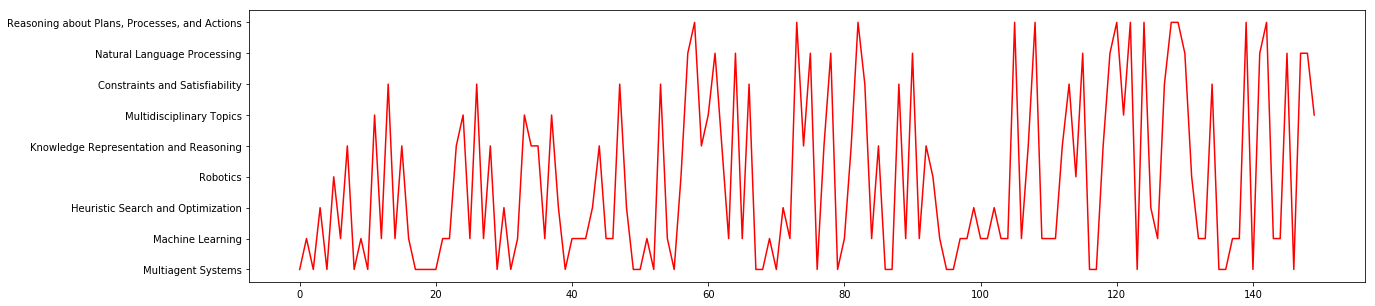

In [0]:
# Plots for comparing the actual classes and predicted classes
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')

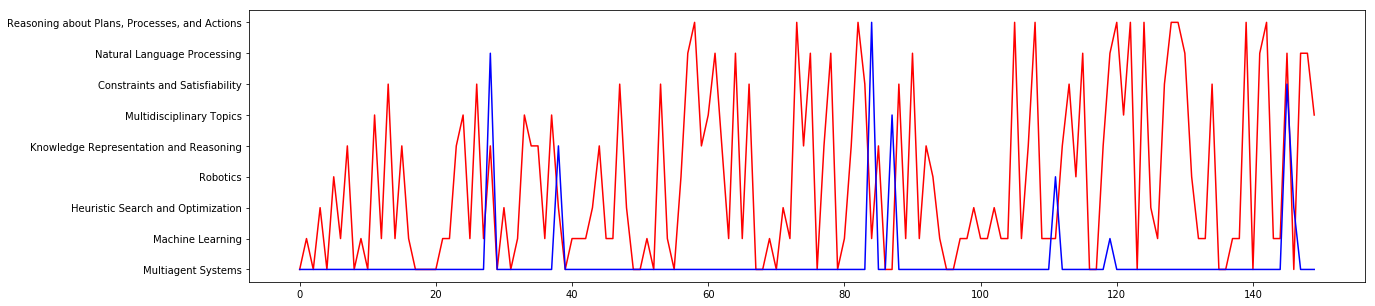

In [0]:
# for Title
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_1,color='b')

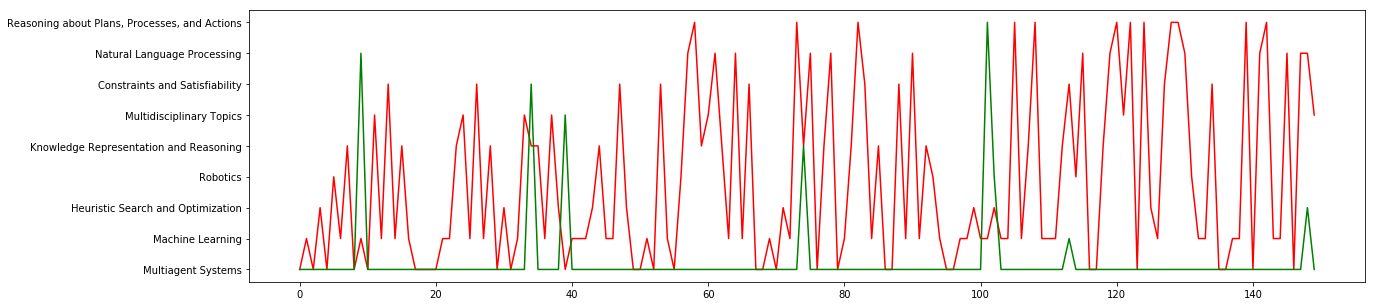

In [0]:
# for keywords
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_2,color='g')

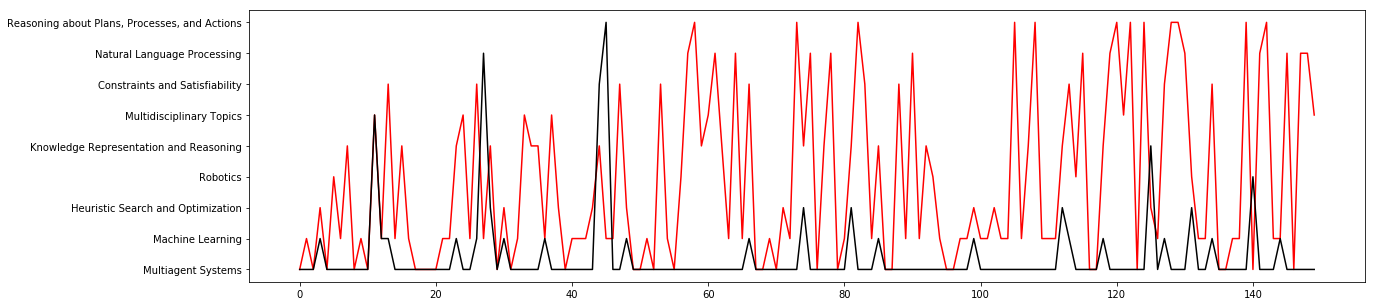

In [0]:
# for topics
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_3,color='black')

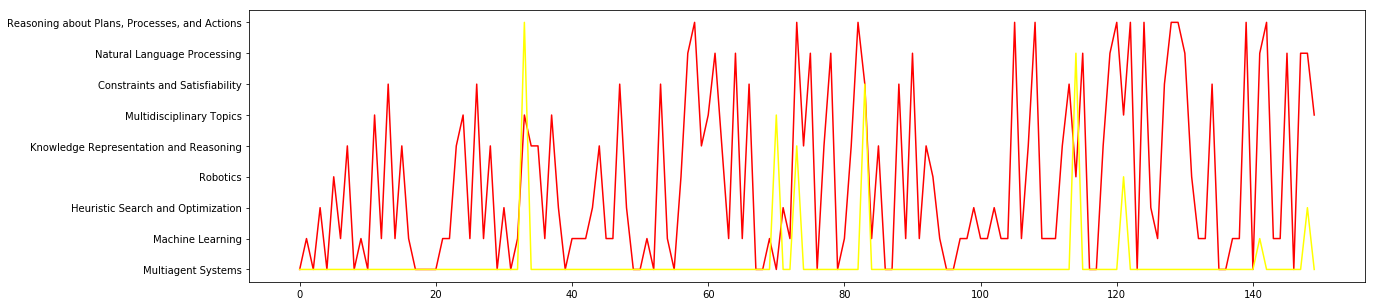

In [0]:
# for abstract
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_4,color='yellow')

Note: For the attribute topics, we are getting a little bit good clustering, but for the other attributes the clustering is not that good in the case of single linkage clustering.

Complete Linkage

In [0]:
clus_1 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='complete').fit(Title)
clus_2 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='complete').fit(keywords)
clus_3 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='complete').fit(topics)
clus_4 = clustering(n_clusters = 9, affinity='precomputed' ,linkage='complete').fit(abstract)
label_1 = clus_1.labels_
label_2 = clus_2.labels_
label_3 = clus_3.labels_
label_4 = clus_4.labels_

In [0]:
print(label_1)
print(label_2)
print(label_3)
print(label_4)

[6 3 6 0 0 0 0 0 0 0 0 0 0 1 7 0 0 0 0 6 0 0 2 0 0 0 0 0 0 0 0 6 3 2 0 0 0
 6 0 0 5 0 3 3 0 6 1 0 6 2 6 2 8 1 1 0 3 7 0 0 6 2 0 1 0 3 0 1 0 2 0 0 0 6
 1 6 0 0 0 0 3 0 0 7 0 0 6 0 0 3 0 0 0 0 0 0 0 0 6 0 0 0 1 3 0 8 3 7 1 0 0
 0 0 0 2 7 6 3 0 0 2 0 0 1 0 0 0 0 0 0 3 1 3 0 0 4 0 0 6 0 0 0 8 3 6 5 4 7
 2 1]
[0 1 2 0 0 0 0 0 0 0 0 0 1 0 4 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 8 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2
 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 8 1 0 0 0 0
 6 0 0 0 0 0 8 0 0 0 0 0 3 0 6 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 8 1 6 5 3 4
 2 7]
[7 0 1 1 7 1 3 1 5 3 5 0 3 1 0 1 3 5 7 5 1 3 0 0 1 0 1 3 8 6 1 5 0 1 2 1 3
 5 4 1 3 0 0 0 5 1 0 0 1 5 1 0 4 1 3 5 1 1 4 1 0 2 0 3 2 3 1 6 5 0 1 4 0 1
 8 2 6 8 1 0 3 8 4 0 0 0 1 7 0 0 2 0 0 1 0 6 1 5 3 1 0 3 0 0 0 4 0 2 4 0 0
 0 8 1 1 2 1 3 8 1 4 1 4 6 1 3 1 1 1 4 0 8 1 3 1 5 6 3 3 2 5 2 4 3 3 2 7 2
 2 3]
[2 5 8 8 5 1 7 8 8 7 8 0 0 1 7 2 7 2 4 4 4 6 4 8 4 3 8 4 2 4 3 4 6 7 0 2 6
 4 4 3 

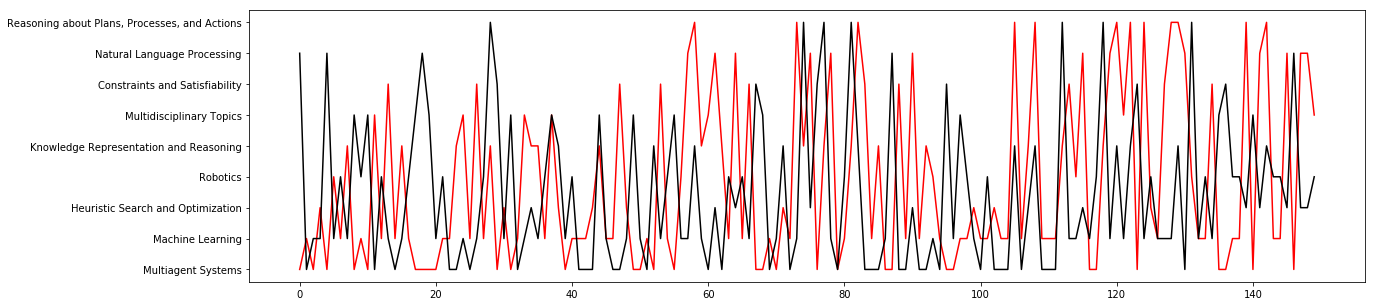

In [0]:
# for topics
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_3,color='black')

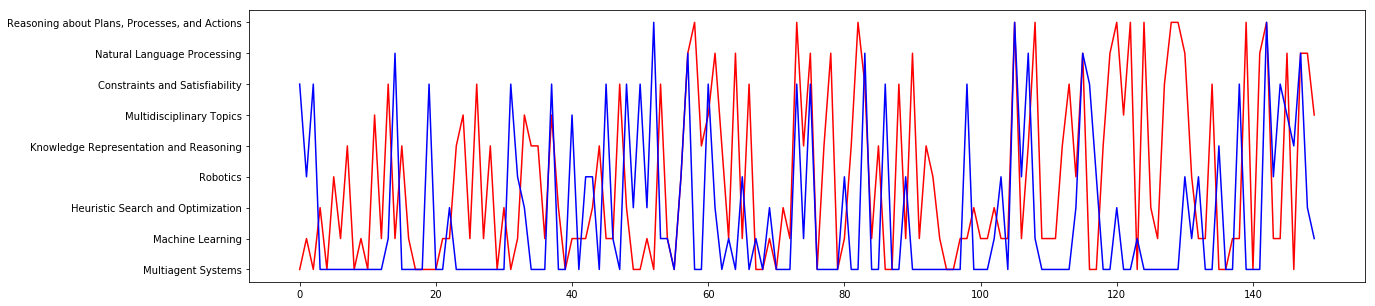

In [0]:
# for Title
plt.figure(figsize=(20,5))
plt.plot(data['High-Level Keyword(s)'],color='r')
plt.plot(label_1,color='b')

#Final Clusters

Unweighted Approach(max vote of predictions)

In [0]:
final = []
for i in range(150):
  temp = []
  temp.append(label_1[i])
  temp.append(label_2[i])
  temp.append(label_3[i])
  temp.append(label_4[i])
  final.append(max(set(temp), key = temp.count))
  